# Classification Model to Predict Product Category From Retail Transactions

## About The Dataset
The dataset is obtained from Kaggle and is formatted in a .csv file. It contains 302,010 records and 30 attributes. The goal is to predict what product category was purchased given information about a transaction. This classification can help highlight consumer traits that relate to the product category they are most likely to purchase from.

## Imports

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Reading the Dataset

In [469]:
data = pd.read_csv('retail_data.csv')
data.shape

(302010, 30)

In [470]:
data.head(10)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
5,6095326.0,41289.0,Ryan Johnson,Haley12@gmail.com,3.292677e+09,532 Ashley Crest Suite 014,Brisbane,New South Wales,74430.0,Australia,...,1185.167224,Electronics,Apple,Tablet,Good,Express,PayPal,Pending,4.0,Lenovo Tab
6,5434096.0,97285.0,Erin Lewis,Arthur76@gmail.com,1.578355e+09,600 Brian Prairie Suite 497,Kitchener,Ontario,47545.0,Canada,...,630.115295,Electronics,Samsung,Television,Bad,Standard,Cash,Processing,1.0,QLED TV
7,2344675.0,26603.0,Angela Fields,Tanya94@gmail.com,3.668096e+09,237 Young Curve,Munich,Berlin,86862.0,Germany,...,46.588070,Clothing,Zara,Shirt,Bad,Same-Day,Cash,Processing,1.0,Dress shirt
8,4155845.0,80175.0,Diane Clark,Martin39@gmail.com,6.219780e+09,8823 Mariah Heights Apt. 263,Wollongong,New South Wales,39820.0,Australia,...,2630.714413,Grocery,Nestle,Chocolate,Bad,Same-Day,Cash,Delivered,1.0,Dark chocolate
9,4926148.0,31878.0,Lori Bell,Jessica33@gmail.com,6.004895e+09,6225 William Lodge,Cologne,Berlin,64317.0,Germany,...,3976.112295,Home Decor,Home Depot,Decorations,Excellent,Standard,Cash,Delivered,4.0,Candles


In [471]:
print ("\nData Columns\n", data.columns)


Data Columns
 Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


## Data Cleaning

Attributes with personal information are removed as they cannot be generalized to a classification model and are therefore not necessary. Similarly, attributes such as Date and Zipcode are redundant being that they can be derived from other attributes. Apart from that, attributes such as Ratings, Feedback, and Time are something that can be attributed to any particular product category so they do not provide relevant information when classifying product category.

In [472]:
# data = data.drop(columns=['City', 'State', 'Zipcode', 'Country', 'Transaction_ID', 'Customer_ID', 'Address', 'Name', 'Email', 'Phone', 'Order_Status', 'Payment_Method', 'products', 'Year', 'Month', 'Time'])
data = data.drop(columns=['City', 'State', 'Country', 'Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'Zipcode', 'Date', 'Year', 'Month', 'Time', 'Feedback', 'Order_Status', 'Ratings', 'products'])

data.columns

Index(['Age', 'Gender', 'Income', 'Customer_Segment', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Shipping_Method', 'Payment_Method'],
      dtype='object')

## Data Exploration

In [473]:
data.describe()

,Age,Total_Purchases,Amount,Total_Amount
count,301837.000000,301649.000000,301653.000000,301660.000000
mean,35.481326,5.359729,255.163659,1367.651156
std,15.021933,2.868575,141.389640,1128.998515
min,18.000000,1.000000,10.000219,10.003750
25%,22.000000,3.000000,132.890764,438.724278
50%,32.000000,5.000000,255.470969,1041.117547
75%,46.000000,8.000000,377.672606,2029.999853
max,70.000000,10.000000,499.997911,4999.625796


In [474]:
unique_counts = data.nunique()

print("Number of unique values per attribute")
print(unique_counts)

Number of unique values per attribute
Age                     53
Gender                   2
Income                   3
Customer_Segment         3
Total_Purchases         10
Amount              299297
Total_Amount        299305
Product_Category         5
Product_Brand           18
Product_Type            33
Shipping_Method          3
Payment_Method           4
dtype: int64


In [475]:
# Display all possible values for each feature
for column in data.columns:
    unique_values = data[column].unique()
    
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("-" * 50)

Unique values in 'Age':
[21. 19. 48. 56. 22. 58. 29. 46. 25. 64. 31. 53. 32. 43. 69. 49. 61. 41.
 38. 59. 20. 67. 50. 26. 66. 24. 54. 28. 34. 65. 40. 68. 36. 57. 27. 35.
 70. 37. 30. 39. 47. 18. 60. 33. 62. 42. 44. 51. 63. 55. 23. 52. nan 45.]
--------------------------------------------------
Unique values in 'Gender':
['Male' 'Female' nan]
--------------------------------------------------
Unique values in 'Income':
['Low' 'High' 'Medium' nan]
--------------------------------------------------
Unique values in 'Customer_Segment':
['Regular' 'Premium' 'New' nan]
--------------------------------------------------
Unique values in 'Total_Purchases':
[ 3.  2.  7.  4.  1.  8. 10.  9.  6.  5. nan]
--------------------------------------------------
Unique values in 'Amount':
[108.0287567 403.3539073 354.4775997 ... 193.5494867 415.4162595
 493.6032674]
--------------------------------------------------
Unique values in 'Total_Amount':
[ 324.08627    806.7078147 1063.432799  ...  193.5494867

In [476]:
# Display the distribution of values within each feature
for column in data.columns:
    value_counts = data[column].value_counts(normalize=True) * 100

    print(f"Percentage of unique values in '{column}':")
    print(value_counts)
    print("-" * 50)

Percentage of unique values in 'Age':
Age
20.0    11.488982
46.0    10.190600
26.0     8.173617
22.0     7.627627
34.0     6.842104
23.0     5.974417
19.0     5.581158
21.0     2.668328
24.0     2.050444
55.0     1.812568
48.0     1.526652
70.0     0.905787
43.0     0.892866
59.0     0.890216
36.0     0.888559
68.0     0.884252
33.0     0.883589
64.0     0.876963
44.0     0.875638
56.0     0.872988
30.0     0.870337
65.0     0.870006
60.0     0.868018
62.0     0.867024
47.0     0.864705
40.0     0.863380
41.0     0.859736
25.0     0.859404
50.0     0.859073
35.0     0.857416
52.0     0.857085
28.0     0.856754
58.0     0.855760
39.0     0.855760
69.0     0.855097
38.0     0.854103
42.0     0.854103
57.0     0.853772
61.0     0.853109
63.0     0.852447
37.0     0.852116
27.0     0.851784
49.0     0.851784
67.0     0.845158
51.0     0.844827
45.0     0.844164
53.0     0.843502
29.0     0.841514
32.0     0.838201
54.0     0.833894
18.0     0.821636
66.0     0.819648
31.0     0.817329
Name

Seeing as only ~1% of our records contain some NaN value in one or more of their features, we can drop these records without a substantial loss of our dataset.

In [477]:
rows_with_nans = data[data.isna().any(axis=1)]

print("\nNumber of NaN Values Per Feature\n")
print(data.isnull().sum())

print(len(rows_with_nans) / len(data))

data = data.dropna()
data.shape


Number of NaN Values Per Feature

Age                 173
Gender              317
Income              290
Customer_Segment    215
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Shipping_Method     337
Payment_Method      297
dtype: int64
0.01076123307175259


(298760, 12)

### Univariate Analysis

<Axes: title={'center': 'Customer Segment Distribution'}, ylabel='count'>

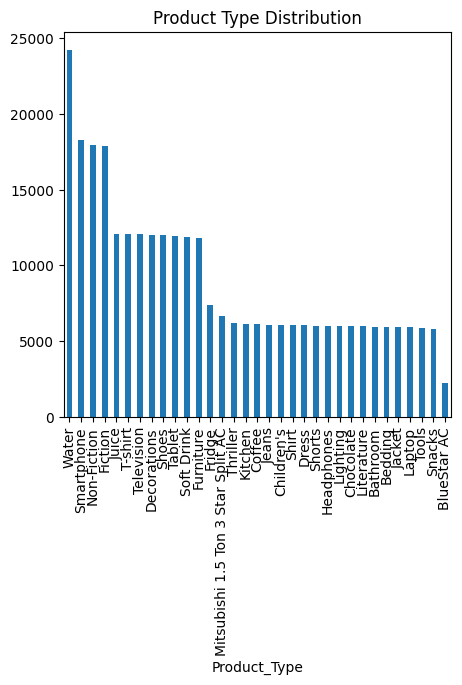

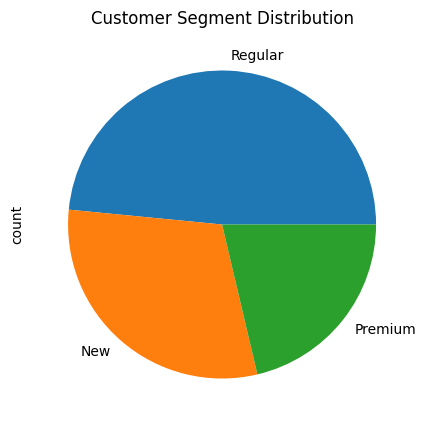

In [478]:
# Product Type Distribution
plt.figure(figsize=(5, 5))
data['Product_Type'].value_counts().plot(kind='bar', title='Product Type Distribution')

# Customer Segment Breakdown
plt.figure(figsize=(5, 5))
data['Customer_Segment'].value_counts().plot(kind='pie', title='Customer Segment Distribution')


## Feature Engineering

In [479]:
item_to_category = {
    'Water': 'Drink',
    'Juice': 'Drink',
    'Soft Drink': 'Drink',
    'Coffee': 'Drink',
    'Chocolate': 'Food',
    'Snacks': 'Food',
    'Non-Fiction': 'Media',
    'Fiction': 'Media',
    'Thriller': 'Media',
    'Literature': 'Media',
    'Television': 'Media',
    'Mitsubishi AC': 'HVAC',
    'BlueStar AC': 'HVAC',
    'Mitsubishi 1.5 Ton 3 Star Split AC': 'HVAC',
    'Fridge': 'Kitchen Equipment',
    'Kitchen': 'Kitchen Equipment',
    'T-shirt': 'Upper Body Clothing',
    'Shirt': 'Upper Body Clothing',
    'Dress': 'Upper Body Clothing',
    'Jacket': 'Upper Body Clothing',
    'Shoes': 'Lower Body Clothing',
    'Jeans': 'Lower Body Clothing',
    'Shorts': 'Lower Body Clothing',
    'Decorations': 'Home Decor',
    'Furniture': 'Home Decor',
    'Lighting': 'Home Decor',
    'Bathroom': 'Home Decor',
    'Bedding': 'Home Decor',
    'Smartphone': 'Electronics',
    'Tablet': 'Electronics',
    'Headphones': 'Electronics',
    'Laptop': 'Electronics',
    'Children\'s': 'Children\'s',
    'Tools': 'Tools'
}

data['Product_Subcategory'] = data['Product_Type'].map(item_to_category)
last_8_columns = data[: -8]
print(last_8_columns.head())

data = data.drop(columns=['Product_Type'])

print("\nProduct_Subcategory (Labels) Distribution\n")
print((data.value_counts() / len(data)) * 100)

    Age  Gender Income Customer_Segment  Total_Purchases      Amount  \
0  21.0    Male    Low          Regular              3.0  108.028757   
1  19.0  Female    Low          Premium              2.0  403.353907   
2  48.0    Male    Low          Regular              3.0  354.477600   
3  56.0    Male   High          Premium              7.0  352.407717   
4  22.0    Male    Low          Premium              2.0  124.276524   

   Total_Amount Product_Category  Product_Brand Product_Type Shipping_Method  \
0    324.086270         Clothing           Nike       Shorts        Same-Day   
1    806.707815      Electronics        Samsung       Tablet        Standard   
2   1063.432799            Books  Penguin Books   Children's        Same-Day   
3   2466.854021       Home Decor     Home Depot        Tools        Standard   
4    248.553049          Grocery         Nestle    Chocolate        Standard   

  Payment_Method  Product_Subcategory  
0     Debit Card  Lower Body Clothing  
1    C

### Data Normalization

In [480]:
# data_encoded = pd.get_dummies(data, columns=['Gender', 'Feedback', 'Product_Subcategory', 'Income', 'Product_Category', 'Product_Brand', 'Customer_Segment', 'Shipping_Method'], drop_first=True)
x = data.drop(columns=['Product_Subcategory'])
y = data['Product_Subcategory']

data_encoded = pd.get_dummies(x, columns=['Gender', 'Income', 'Product_Brand', 'Shipping_Method', 'Payment_Method', 'Customer_Segment', 'Product_Category'], drop_first=True)
data_encoded.head(10)

,Age,Total_Purchases,Amount,Total_Amount,Gender_Male,Income_Low,Income_Medium,Product_Brand_Apple,Product_Brand_Bed Bath & Beyond,Product_Brand_BlueStar,...,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Customer_Segment_Premium,Customer_Segment_Regular,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Grocery,Product_Category_Home Decor
0,21.0,3.0,108.028757,324.086270,True,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False
1,19.0,2.0,403.353907,806.707815,False,True,False,False,False,False,...,True,True,False,False,True,False,False,True,False,False
2,48.0,3.0,354.477600,1063.432799,True,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,56.0,7.0,352.407717,2466.854021,True,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,True
4,22.0,2.0,124.276524,248.553049,True,True,False,False,False,False,...,True,False,False,False,True,False,False,False,True,False
5,58.0,4.0,296.291806,1185.167224,False,False,True,True,False,False,...,False,False,False,True,True,False,False,True,False,False
6,29.0,2.0,315.057648,630.115295,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
7,29.0,1.0,46.588070,46.588070,True,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
8,46.0,8.0,328.839302,2630.714413,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,25.0,10.0,397.611229,3976.112295,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [481]:
data_normalized = data_encoded.copy()
scaler = StandardScaler()

data_normalized[data_normalized.columns] = scaler.fit_transform(data_normalized[data_normalized.columns])

data_normalized.head()

,Age,Total_Purchases,Amount,Total_Amount,Gender_Male,Income_Low,Income_Medium,Product_Brand_Apple,Product_Brand_Bed Bath & Beyond,Product_Brand_BlueStar,...,Shipping_Method_Standard,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_PayPal,Customer_Segment_Premium,Customer_Segment_Regular,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Grocery,Product_Category_Home Decor
0,-0.963376,-0.822537,-1.040481,-0.924352,0.779943,1.461583,-0.871423,-0.252349,-0.253495,-0.086876,...,-0.679096,-0.652745,1.711911,-0.503554,-0.520447,1.031235,2.124045,-0.555719,-0.533269,-0.468682
1,-1.096516,-1.171129,1.048377,-0.496794,-1.282144,1.461583,-0.871423,-0.252349,-0.253495,-0.086876,...,1.472545,1.531992,-0.584143,-0.503554,1.921426,-0.969711,-0.470800,1.799470,-0.533269,-0.468682
2,0.834017,-0.822537,0.702671,-0.269359,0.779943,1.461583,-0.871423,-0.252349,-0.253495,-0.086876,...,-0.679096,1.531992,-0.584143,-0.503554,-0.520447,1.031235,-0.470800,-0.555719,-0.533269,-0.468682
3,1.366578,0.571832,0.688031,0.973944,0.779943,-0.684190,-0.871423,-0.252349,-0.253495,-0.086876,...,1.472545,-0.652745,-0.584143,1.985885,1.921426,-0.969711,-0.470800,-0.555719,-0.533269,2.133644
4,-0.896806,-1.171129,-0.925559,-0.991268,0.779943,1.461583,-0.871423,-0.252349,-0.253495,-0.086876,...,1.472545,-0.652745,-0.584143,-0.503554,1.921426,-0.969711,-0.470800,-0.555719,1.875225,-0.468682


## Decision Trees

In [482]:
x_train, x_test, y_train, y_test = train_test_split(data_normalized, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree = decision_tree.fit(x_train, y_train)

# Make predictions
predictions = decision_tree.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(predictions, y_test)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


## Neural Networks

In [483]:
# class node:
#     def __init__(self, node_value):
#         self.node_value = node_value
        
# class layer:
#     def __init__(self, activation_function, nodes, edges, input_layer):
#         self.activation_function = activation_function
#         self.nodes = nodes
#         self.edges = edges
#         self.input_layer = input_layer

# def create_network(nodes_per_layer):
#     layers = []

#     # Create Input Layer
#     input_nodes = []
#     for _ in range(nodes_per_layer):
#         input_nodes.append(node())
#     input_layer = layer(None, input_nodes, None, True)
#     layer.append(input_layer)

#     # Create Hidden Layers
#     for _ in range(2):
#         hidden_layer_nodes = []
#         for _ in range(nodes_per_layer):
#             hidden_layer_nodes.append(node())
#         hidden_layer = layer(None, hidden_layer_nodes, None, False)
#         layers.append(hidden_layer)



# # Iterate over all the records
# for index, transaction in data.iterrows():

## SVMs

In [484]:
# Your Code Here

## K-Nearest Neighbor

In [485]:
# Your Code Here

## Naive Bayes

In [486]:
# Your Code Here